In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.metrics import confusion_matrix

# reads in the prediction dataframe

In [2]:
roberta = pd.read_csv('data/trained/roberta-model-scores.gz', index_col=0)
vader_train = pd.read_csv('data/trained/vader-model-train-scores.gz', index_col=0)
vader_test = pd.read_csv('data/trained/vader-model-test-scores.gz', index_col=0)
roberta

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,user_id,stars_y,useful,funny,cool,text,date,neg,neu,pos
index,,,,,,,,,,,,,,,,,,,,,
33550,jEvoDXtF3xMJsiPPbqGSmw,Tres Carnales Taqueria,10119 100A St,Edmonton,AB,T5J 0C8,53.541434,-113.491816,4.0,429,...,BG9Iy_5gznP1KHfatXZ0lg,1,0,0,0,"If you are Claiming to be experts in ""MEXICAN...",2020-07-07 06:53:15,0.348361,0.470583,0.181056
24098,otGcwLlVcsYK73ULzrLXEA,Black Pearl Seafood Bar,10132 104 Street,Edmonton,AB,T5J 1A7,53.541740,-113.499502,4.0,80,...,nC9V777rlZbKWm3m0QlXYg,3,1,0,0,Had a lovely meal out on the patio. I had the ...,2018-07-01 19:20:48,0.002162,0.019565,0.978273
17778,f9_TLVlUHBv0869CygEbZg,Dadeo,10548A 82 Avenue NW,Edmonton,AB,T6E 2A4,53.518408,-113.502667,4.0,237,...,P6q3d2JaMgwPPnZP9IhbeA,3,0,0,1,I think I had the fish poboy when I went. The ...,2017-05-07 03:52:51,0.480000,0.359089,0.160911
5185,3Yogz58lIto-kceF2y-THg,Double Greeting Wonton House,10212 96 Street NW,Edmonton,AB,T5H 2G7,53.544889,-113.483042,4.0,52,...,3oT-wLj8vNBhWGKlCvfCxA,2,2,0,0,You'd think with the other reviews that this p...,2012-11-18 18:20:50,0.568168,0.304713,0.127119
59505,Rl0XbZP_8AfNgn4S6WfoQw,Careit Urban Deli,10226 104th Street,Edmonton,AB,T5J 1B8,53.543689,-113.499694,4.0,9,...,AvXs8_0tuoKbuB4_9ePIZg,4,1,0,1,What a great new addition of eateries to 104th...,2016-07-11 03:16:29,0.002746,0.024336,0.972918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10282,Z2gGsSqf9KknTvMGp1yByw,Moxie's Grill & Bar,10628 Kingsway Avenue,Edmonton,AB,T5G 0W8,53.559295,-113.503637,3.0,40,...,4UU2qHHNFDlrktj78O354Q,1,0,0,0,I'm a very picky eater. 2nd visit here and ye...,2010-08-06 18:56:45,0.977416,0.019802,0.002782
22939,sYRNtW049aogQi_NjMFSJw,El Rancho Spanish Restaurant,11810 87th Street NW,Edmonton,AB,T5B 3M9,53.570675,-113.474585,3.5,54,...,-GQH3Eif2qCP07v0wFC1Pg,4,15,4,4,I'm a bit shocked that no one has reviewed El ...,2011-03-22 17:36:01,0.048177,0.550082,0.401741
39151,Uc1_v_Z9aWMA4w_u4SoRXA,Refinery Grill,10406 Mayfield Road,Edmonton,AB,T5P 4P4,53.546627,-113.613707,4.0,46,...,qAoekZw9MECmkFke-h99Jw,2,0,0,0,Maybe good for Lunch and Supper but Breakfast ...,2018-08-12 19:43:04,0.839176,0.127481,0.033343


In [3]:
vader_test

,review_id,neg,neu,pos,compound,business_id,name,address,city,state,...,attributes,categories,hours,user_id,stars_y,useful,funny,cool,text,date
0,CLnoJnso-R87s-7aKMXWSw,0.114,0.800,0.086,-0.3260,qHOVeIzwDB7YiGiEkGy-LQ,IHOP,10803 170th ST,Edmonton,AB,...,"b'{""RestaurantsAttire"": ""\'casual\'"", ""Restaur...","Breakfast & Brunch, Restaurants, Burgers, Amer...","b'{""Monday"": ""7:0-18:30"", ""Tuesday"": ""7:30-15:...",wFudYB4sjr5yj4R2-lyFyQ,2,1,0,0,Really not impressed. Since this location jus...,2016-09-07 18:55:29
1,G9qOLm1fc2_73BkN8cCCrA,0.046,0.797,0.157,0.9863,Pftp2bkQD91tiUnnPD0FYA,Olympia Ethiopian Restaurant,15608 103 Avenue,Edmonton,AB,...,"b'{""RestaurantsPriceRange2"": ""2"", ""Restaurants...","Buffets, Cafes, Food, Restaurants, Ethiopian, ...","b'{""Monday"": ""11:0-19:0"", ""Tuesday"": ""11:0-19:...",iEhpkdXhqA6ozUBwKYPPPA,3,4,0,0,Nice little place! Glad they got some better s...,2015-10-25 06:01:10
2,tlfsMB9qihR9wZHE-fgr8w,0.074,0.783,0.143,0.9885,jEvoDXtF3xMJsiPPbqGSmw,Tres Carnales Taqueria,10119 100A St,Edmonton,AB,...,"b'{""BikeParking"": ""False"", ""GoodForKids"": ""Tru...","Restaurants, Mexican","b'{""Monday"": ""12:0-21:0"", ""Tuesday"": ""12:0-21:...",ZatiTUEcujWxDTXqIIyBKQ,2,5,0,1,This was my first visit to Tres Carnales. I wo...,2019-06-21 21:03:39
3,Lx5_aW_5-2uQUwB-qF6FFg,0.138,0.791,0.071,-0.8161,F-HzRgpiPQZiCFeZVDd2MQ,Noodle 42,13847 42 Street NW,Edmonton,AB,...,"b'{""RestaurantsAttire"": ""u\'casual\'"", ""Restau...","Chinese, Restaurants, Vietnamese","b'{""Monday"": ""16:0-21:0"", ""Tuesday"": ""16:0-21:...",a5ESkMyWIhwPszOo8H66vQ,1,0,0,0,"Had #63 (a combo plate). Very greasy, one item...",2011-04-13 20:00:15
4,IdGWwEyU9e5qskTFofQ3SA,0.035,0.761,0.204,0.9870,yLIn3po-fKb0T3UIoJdiyQ,Famoso Neapolitan Pizzeria,11750 Jasper Avenue NW,Edmonton,AB,...,"b'{""NoiseLevel"": ""u\'average\'"", ""GoodForKids""...","Italian, Restaurants, Pizza","b'{""Monday"": ""12:0-21:0"", ""Tuesday"": ""12:0-21:...",VjA1teP4BA2y9ZNzfihr0w,4,4,2,3,We were looking for good spaghetti and meatbal...,2017-08-19 04:19:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20140,zZUR6tJuOtxmHGH2VrIUiw,0.055,0.872,0.072,0.8103,a4o7LF0Aeo6a7t379Kcjgw,Eddie's Donair & Pizza,16757 91 Street NW,Edmonton,AB,...,"b'{""NoiseLevel"": ""u\'quiet\'"", ""HasTV"": ""True""...","Pizza, French, Chicken Wings, Donairs, Food, R...","b'{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:...",gYODgbiRz2mBfLi1VG02UA,2,4,1,0,Stopped into this little diner the other day.\...,2012-01-22 20:35:27
20141,9ymQTA-M-cUgyllsdk4tBA,0.000,0.806,0.194,0.8555,YNcVAMg2u10Bad8qiFE-tw,Teriyaki Corner Japanese Bistro,1064-91 Street SW,Edmonton,AB,...,"b'{""BusinessParking"": ""{\'garage\': False, \'s...","Japanese, Restaurants","b'{""Monday"": ""11:30-21:0"", ""Tuesday"": ""11:30-2...",cyFN4LyugoFq0XGGLFPb3A,3,1,0,0,We went here for the first time the other nigh...,2014-03-21 18:45:20
20142,q_Ay4p7-HCAaybRiEQe1bg,0.000,0.584,0.416,0.9896,ZTcCAGRxxXAf_K6mgFoW0g,Dogwood Cafe,12130 River Valley Road,Edmonton,AB,...,"b'{""GoodForMeal"": ""{\'dessert\': False, \'late...","Gastropubs, Cafes, Scandinavian, Restaurants","b'{""Thursday"": ""16:0-21:0"", ""Friday"": ""16:0-21...",I1MHrxdr98VXT-Dj-vEXLQ,5,2,0,0,One of my favourite places to have brunch. sta...,2017-10-12 04:33:15
20143,Ey01QhCbC10mULHNqXGmUQ,0.039,0.781,0.180,0.9855,HYiLl8OWiiUSVJpOQyXVsA,Biera,9570 - 76th Avenue,Edmonton,AB,...,"b'{""GoodForDancing"": ""False"", ""RestaurantsGood...","Nightlife, Food, Gastropubs, Bars, Restaurants...","b'{""Monday"": ""0:0-0:0"", ""Tuesday"": ""15:0-22:0""...",poqTbV4MBIV2PT3OP02SHQ,2,0,0,0,This has been my one of my favourite restauran...,2019-08-26 02:45:09


# Plotting sentiment with star rating

In [4]:
def plotter(df):
    #It's plotting time. seaborn style.

    fig , axes = plt.subplots(1,4,figsize = (24,8))
    sns.barplot(data=df, x='stars_y', y= 'pos', ax=axes[0])
    sns.barplot(data=df, x='stars_y', y= 'neg', ax=axes[1])
    sns.barplot(data=df, x='stars_y', y= 'neu', ax=axes[2])
    sns.barplot(data=df, x='stars_y', y= 'compound', ax=axes[3])

    axes[0].set(xlabel='Review Given', ylabel='Positive Classification' )
    axes[1].set(xlabel='Review Given', ylabel='Negative Classification')
    axes[2].set(xlabel='Review Given', ylabel='Neutral Classification')


    axes[0].set_title('Positive Reviews in relation to Stars')
    axes[1].set_title('Negative Reviews in relation to Stars')
    axes[2].set_title('Neutral Reviews in relation to Stars')
    axes[3].set_title('Compound Scores in relation to Stars')
    plt.show()

#plotter function for models

exception occured


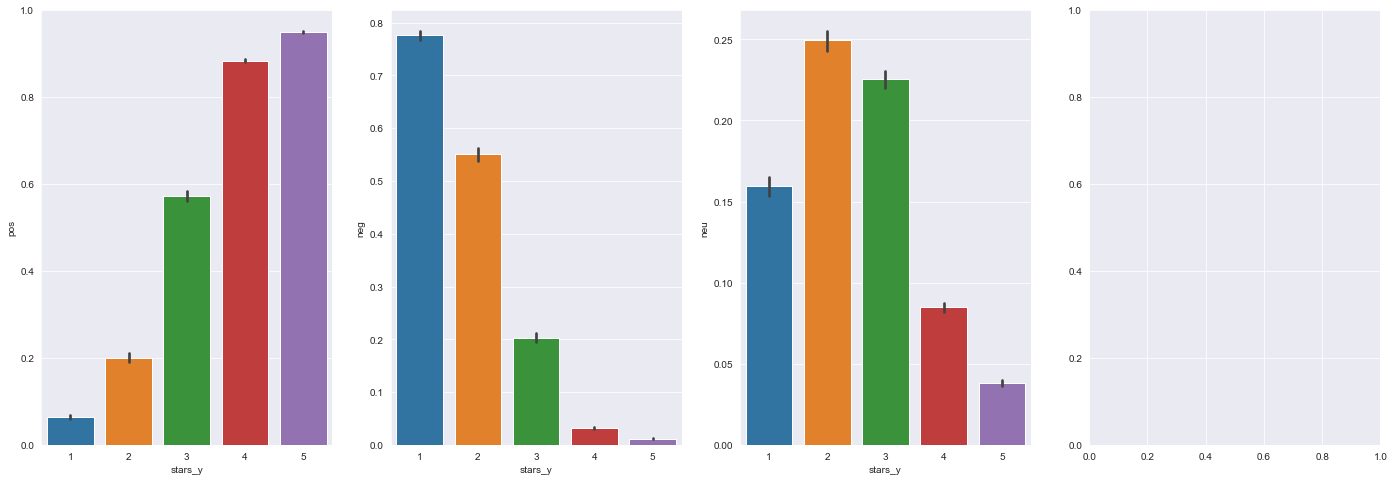

In [5]:
try:
    plotter(roberta)
except:
    print('exception occured')

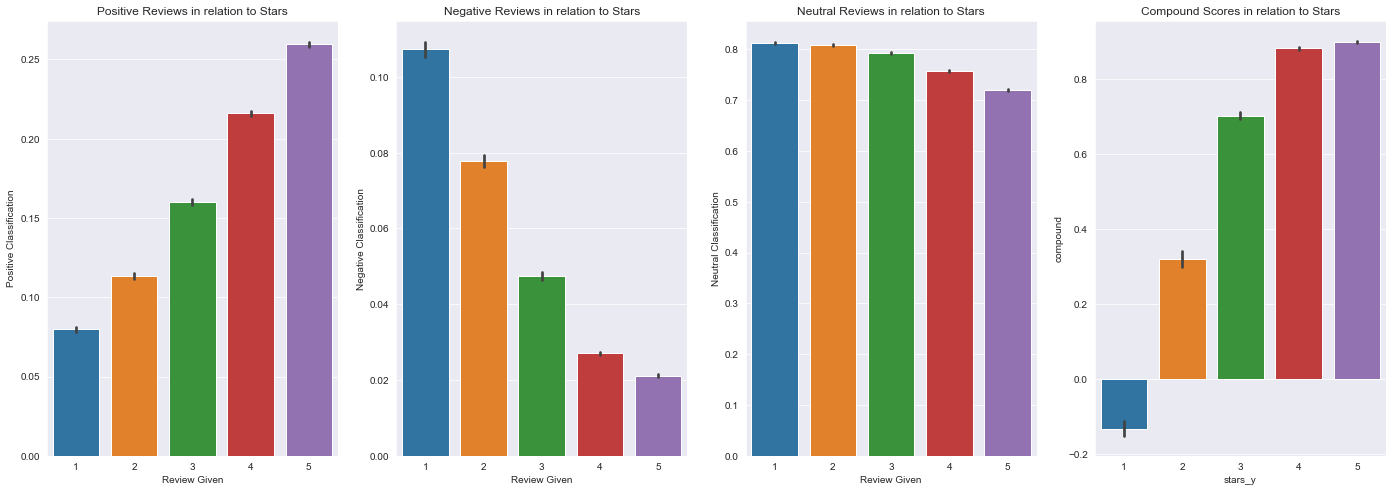

In [6]:
plotter(vader_train)

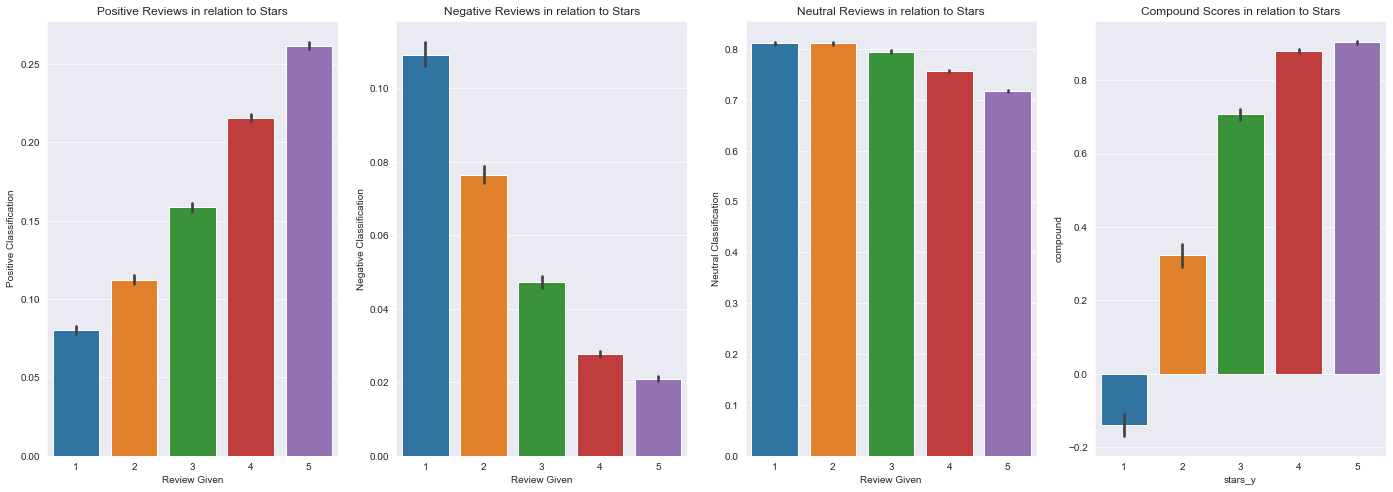

In [7]:
plotter(vader_test)

# Computing Optimal Compound Score Threshholds

In [8]:
# Assigns labels based on star ratings as a baseline
def assign_rating(df):
    if df['stars_y'] == 3:
        return "neutral"
    elif df['stars_y'] > 3:
        return "positive"
    else:
        return "negative"

vader_train['label'] = vader_train.apply(assign_rating, axis=1)
vader_test['label'] = vader_test.apply(assign_rating, axis=1)
roberta['label'] = roberta.apply(assign_rating, axis=1)

In [9]:
threshholds = [(-0.03,0.03), (-0.04,0.04), (-0.05,0.05), (-0.06,0.06), (-0.07,0.07)]
scores = {}

In [10]:
def classify(df, threshholds):
    negative = threshholds[0]
    neutral = threshholds[1]
    positive = threshholds[2]

    if negative[0] <= df['compound'] <= negative[1]:
        return 'negative'
    elif neutral[0] < df['compound'] < neutral[1]:
        return 'neutral'
    elif positive[0] <= df['compound'] <= positive[1]:
        return 'positive'
    else:
        return None


In [11]:
for threshold in threshholds:
    # creates the thresholds
    negative = [-1, threshold[0]]
    neutral = threshold
    positive = [threshold[1], 1]

    # puts it into classification thresholds
    classification = [negative, neutral, positive]

    vader_train['prediction'] = vader_train.apply(classify, threshholds=classification, axis=1)
    scores[threshold] = (vader_train['prediction'] == vader_train['label']).sum()/vader_train.shape[0]



In [12]:
pprint(scores)
optimal_boundary = [(-1, -0.04), (-0.04, 0.04), (0.04,1)]

{(-0.07, 0.07): 0.7324851605216688,
 (-0.06, 0.06): 0.7325277109971704,
 (-0.05, 0.05): 0.7326766376614259,
 (-0.04, 0.04): 0.7327830138501797,
 (-0.03, 0.03): 0.732761738612429}



Looking at the classification scores, we have the best predictive accuracy on the train set with a (-0.04, 0.04) threshold. We will apply this threshold to our analysis

# Metrics Evaluation

In [13]:
vader_test['prediction'] = vader_test.apply(classify, threshholds=optimal_boundary, axis=1)

In [14]:
def classify_roberta(df):
    index = np.argmax(df[['neg','neu','pos']])
    if index == 0:
        return 'negative'
    elif index == 1:
        return 'neutral'
    elif index == 2:
        return 'positive'
    else:
        return None
roberta['prediction'] = roberta.apply(classify_roberta, axis=1)
roberta['prediction'].head(5)

index
33550     neutral
24098    positive
17778    negative
5185     negative
59505    positive
Name: prediction, dtype: object

In [19]:
vader_test_score = (vader_test['prediction'] == vader_test['label']).sum()/vader_test.shape[0]
roberta_test_score = (roberta['prediction'] == roberta['label']).sum()/roberta.shape[0]

print('vader test accuracy score:', vader_test_score)
print('roberta test accuracy score:', roberta_test_score)

vader test accuracy score: 0.7356167783569124
roberta test accuracy score: 0.8132539091586002


The vader model has a correct classification rate of 73.56% which is very similar to the classification rate in the training set.

The pretrained roberta model beats out the vader test accuracy by ~ 8 percentage points

In [23]:
confusion_matrix(vader_test['label'], vader_test['prediction'], labels=['negative', 'neutral', 'positive'])

array([[ 1746,   124,  2031],
       [  271,    32,  2649],
       [  190,    61, 13041]])

$C_{ij}$ is the observations in group i, predicted to be in group j

Vader classification has difficulties telling apart negative vs positive prediction for labels that are negative and has a tendency to classify neutral labels as positive.

This model overall has a bias towards positive predictions

In [24]:
confusion_matrix(roberta['label'], roberta['prediction'], labels=['negative', 'neutral', 'positive'])

array([[ 3177,   389,   419],
       [  608,   388,  2025],
       [  123,   198, 12818]])

Roberta classification is better at distinguising between positive and negative labels. It does have difficulties with neutral labels, generally classifying it as positive

# Analysis of misclassified labels

In [27]:
vader_misclass = vader_test[vader_test['label'] != vader_test['prediction']]
roberta_misclass = roberta[roberta['label'] != roberta['prediction']]

In [29]:
vader_misclass.iloc[0]['text']

"Nice little place! Glad they got some better signage. Otherwise, it's not that easy to spot, with it being a house and all.\n\nIt's small, and the menu is small, but the flavors speak volumes. I wasn't all that enthusiastic about the vegan buffet--I love my meat--but we went for it anyway and ordered a side dish of raw beef. Sorry, can't remember the name of it, and probably couldn't spell it anyway.\n\nI'm pleased and surprised by how much I enjoyed the buffet. Especially the potato stew and lentils! I ate LOTS of that! I think I would have liked the meat dish if it wasn't quite so spicy. I couldn't taste the beef. I'm not one who likes a lot of spice, so maybe that's just about personal preferences.\n\nThis place is a three for these reasons: The family serving us were friendly and sweet, but were so intent on educating us on 'Teff', their star ingredient, they'd forget drink orders. They were otherwise a little inattentive. We'd have to call them from the counter to get another bee

In [35]:
print('star rating: ', vader_misclass.iloc[0]['stars_y'], '\n'
    "label: ", vader_misclass.iloc[0]['label'],'\n', "prediction:", vader_misclass.iloc[0]['prediction'])

star rating:  3 
label:  neutral 
 prediction: positive


Conceptually, this review does give both positive and negative sentiment, the misclassification here is reasonable

In [36]:
roberta_misclass.iloc[0]['text']

'If you are Claiming to be experts in  "MEXICAN FOOD RESTAURANT" please at least don\'t sell dumb down version of Americanized Mexican Food. Remember that many Canadians have Vacationed in many part of Southern Mexico, both Atlantic coast side, and Pacific coastal areas.  I personally love the seafood from the Pacific areas (It differs in many ways from the common supply of Atlantic Tilapias and other cheap fishes full of Contaminated Mercury in The gulf of Mexico. If are showing people that your place will be a great experience, don\'t just fill up with trinkets. You should at least mimic the "REAL MEXICAN RECIPES" .\nYou probably know "CARNALES" means brothers? How can a Canadian, an Asian and a Mexican be blood brothers?  People that drink while eating in your restaurant, are not in their right minds to realize that they are being duped with water down, under cooked, and way smaller portions to consider this place a MEXICAN GASTRONOMICAL EXPERIENCE. You should focus on selling beer 

In [38]:
print('star rating: ', roberta_misclass.iloc[0]['stars_y'], '\n',
      "label: ", roberta_misclass.iloc[0]['label'],'\n', "prediction:", roberta_misclass.iloc[0]['prediction'])

star rating:  1 
 label:  negative 
 prediction: neutral
